Dataset : Employee Attrition Classification Dataset
* [link :]https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset/data)

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import scipy.stats as stats
from sklearn.metrics import roc_auc_score
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import pickle
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

# Import Dataset

In [ ]:
df_train= pd.read_csv('/content/train.csv')

df_train.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
df_train.shape

(59598, 24)

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,83,Master’s Degree,Married,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,Yes,55,Associate Degree,Single,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,Yes,14,Associate Degree,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,43,Master’s Degree,Single,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,Yes,47,Master’s Degree,Married,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [ ]:
df_test.shape

(14900, 24)

# Data Understanding

Synthetic Employee Attrition Dataset adalah dataset yang dirancang untuk analisis dan prediksi tingkat keluar-masuk karyawan (attrition). Dataset ini berisi informasi rinci tentang berbagai aspek profil karyawan, termasuk demografi, fitur terkait pekerjaan, dan kondisi pribadi.

Dataset ini terdiri dari 74.498 sampel yang dibagi menjadi training set dan testing set untuk mempermudah pengembangan dan evaluasi model. Setiap data mencakup Employee ID unik dan fitur-fitur yang memengaruhi tingkat attrition. Tujuan dari dataset ini adalah untuk memahami faktor-faktor yang menyebabkan attrition serta mengembangkan model prediktif untuk mengidentifikasi karyawan yang berisiko keluar dari perusahaan.

Dataset ini sangat cocok untuk analisis HR, pengembangan model pembelajaran mesin, dan demonstrasi teknik analisis data tingkat lanjut. Dataset ini memberikan gambaran komprehensif dan realistis tentang faktor-faktor yang memengaruhi retensi karyawan, sehingga menjadi sumber yang berharga bagi peneliti dan praktisi di bidang sumber daya manusia serta pengembangan organisasi.

Fitur:
1. Employee ID: Identitas unik yang diberikan kepada setiap karyawan.
2. Age: Usia karyawan, berkisar antara 18 hingga 60 tahun.
3. Gender: Jenis kelamin karyawan.
4. Years at Company: Jumlah tahun karyawan bekerja di perusahaan.
5. Monthly Income: Gaji bulanan karyawan, dalam dolar.
6. Job Role: Departemen atau peran karyawan, dikategorikan seperti Finance, Healthcare, Technology, Education, dan Media.
7. Work-Life Balance: Persepsi karyawan tentang keseimbangan antara pekerjaan dan kehidupan pribadi (Poor, Below Average, Good, Excellent).
8. Job Satisfaction: Tingkat kepuasan karyawan terhadap pekerjaannya (Very Low, Low, Medium, High).
9. Performance Rating: Penilaian performa karyawan (Low, Below Average, Average, High).
10. Number of Promotions: Jumlah total promosi yang pernah diterima karyawan.
11. Overtime: indikator apakah karyawan bekerja lembur atau tidak. Kolom ini berisi nilai Yes jika karyawan melakukan lembur dan No jika tidak.
12. Distance from Home: Jarak antara rumah karyawan dan tempat kerja, dalam mil.
13. Education Level: Tingkat pendidikan tertinggi yang telah dicapai oleh karyawan (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).
14. Marital Status: Status pernikahan karyawan (Divorced, Married, Single).
15. Number of Dependents: jumlah tanggungan yang dimiliki oleh karyawan, seperti anak atau anggota keluarga lain yang bergantung secara finansial pada karyawan tersebut
16. Job Level: Level pekerjaan karyawan (Entry, Mid, Senior).
17. Company Size: Ukuran perusahaan tempat karyawan bekerja (Small, Medium, Large).
18. Company Tenure: Jumlah total tahun karyawan bekerja di industri tersebut.
19. Remote Work: Apakah karyawan bekerja secara jarak jauh (Yes atau No).
20. Leadership Opportunities: Apakah karyawan memiliki peluang kepemimpinan (Yes atau No).
21. Innovation Opportunities: Apakah karyawan memiliki peluang inovasi (Yes atau No).
22. Company Reputation: Persepsi karyawan terhadap reputasi perusahaan (Very Poor, Poor, Good, Excellent).
23. Employee Recognition: Tingkat penghargaan yang diterima karyawan (Very Low, Low, Medium, High).
24. Attrition: Apakah karyawan telah keluar dari perusahaan, diwakili dengan 0 (bertahan) dan 1 (keluar).

Goal Project : Dapat memahami faktor-faktor yang menyebabkan attrition serta mengembangkan model prediktif untuk mengidentifikasi karyawan yang berisiko keluar dari perusahaan.


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

# Data Cleaning

## Missing Value

In [ ]:
# Menampilkan jumlah nilai null per kolom
null_data_train = df_train.isnull().sum().reset_index()
null_data_train.columns = ['Column', 'Missing Value']


# Menampilkan hasil dalam bentuk tabel
display(null_data_train)  # Tabel nilai null

,Column,Missing Value
0,Employee ID,0
1,Age,0
2,Gender,0
3,Years at Company,0
4,Job Role,0
5,Monthly Income,0
6,Work-Life Balance,0
7,Job Satisfaction,0
8,Performance Rating,0
9,Number of Promotions,0


In [ ]:
# Menampilkan jumlah nilai null per kolom
null_data_test = df_test.isnull().sum().reset_index()
null_data_test.columns = ['Column', 'Missing Value']


# Menampilkan hasil dalam bentuk tabel
display(null_data_test)  # Tabel nilai null

,Column,Missing Value
0,Employee ID,0
1,Age,0
2,Gender,0
3,Years at Company,0
4,Job Role,0
5,Monthly Income,0
6,Work-Life Balance,0
7,Job Satisfaction,0
8,Performance Rating,0
9,Number of Promotions,0


## Duplicate Handling

In [ ]:
# Menampilkan baris yang terduplikasi
duplicates = df_train[df_train.duplicated()]

# Menampilkan kolom yang terduplikasi dan jumlahnya
duplicates_count = duplicates.shape[0]

# Menampilkan hasil
print(f"Jumlah data Train terduplikasi: {duplicates_count}")
print("Data duplikat:")
print(duplicates)

Jumlah data Train terduplikasi: 0
Data duplikat:
Empty DataFrame
Columns: [Employee ID, Age, Gender, Years at Company, Job Role, Monthly Income, Work-Life Balance, Job Satisfaction, Performance Rating, Number of Promotions, Overtime, Distance from Home, Education Level, Marital Status, Number of Dependents, Job Level, Company Size, Company Tenure, Remote Work, Leadership Opportunities, Innovation Opportunities, Company Reputation, Employee Recognition, Attrition]
Index: []


In [ ]:
# Menampilkan baris yang terduplikasi
duplicates = df_train[df_train.duplicated()]

# Menampilkan kolom yang terduplikasi dan jumlahnya
duplicates_count = duplicates.shape[0]

# Menampilkan hasil
print(f"Jumlah data Test terduplikasi: {duplicates_count}")
print("Data duplikat:")
print(duplicates)

Jumlah data Test terduplikasi: 0
Data duplikat:
Empty DataFrame
Columns: [Employee ID, Age, Gender, Years at Company, Job Role, Monthly Income, Work-Life Balance, Job Satisfaction, Performance Rating, Number of Promotions, Overtime, Distance from Home, Education Level, Marital Status, Number of Dependents, Job Level, Company Size, Company Tenure, Remote Work, Leadership Opportunities, Innovation Opportunities, Company Reputation, Employee Recognition, Attrition]
Index: []


## Outliers Handling

In [ ]:
# Select only numerical columns
numerical_df = df_train.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define thresholds for outliers
min_threshold = Q1 - 1.5 * IQR
max_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((numerical_df < min_threshold) | (numerical_df > max_threshold)).any(axis=1)

# Print or process the outliers
print("Number of outliers:", outliers.sum())
print("Outlier rows:\n", df_train[outliers])

Number of outliers: 323
Outlier rows:
        Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
387          46092   24  Female                14     Finance           15495   
465           2745   58  Female                48  Technology            8460   
662          50335   57  Female                49   Education            5236   
843          53893   59    Male                49  Healthcare            8295   
1373         16371   56  Female                48       Media            5527   
...            ...  ...     ...               ...         ...             ...   
58676        53174   59  Female                48     Finance            3745   
58800        73921   58  Female                48     Finance            7114   
58949        59495   59    Male                50       Media            5659   
59385        15152   59  Female                50     Finance            8363   
59577        25659   58  Female                49       Media         

In [ ]:
# Hapus data outliers dari df_train
df_train_cleaned= df_train[~outliers]

## Verifikasi jumlah data sebelum dan setelah penghapusan outliers
before_removal = numerical_df.shape[0]
after_removal = df_train_cleaned.shape[0]

# Hitung jumlah baris yang telah dihapus
rows_removed = before_removal - after_removal

print(f"Number of rows removed due to outliers: {rows_removed}")
print("Cleaned DataFrame shape:", df_train_cleaned.shape)

Number of rows removed due to outliers: 323
Cleaned DataFrame shape: (59275, 24)


## Menghapus data yang tidak masuk akal dan tidak penting


In [ ]:
# Count of all such rows
df_train_cleaned[abs(df_train_cleaned['Age'] - df_train_cleaned['Years at Company']) < 18].shape[0]

23508

In [ ]:
df_test[abs(df_test['Age'] - df_test['Years at Company']) < 18].shape[0]

6015

In [ ]:
# Dropping all such rows
df_train_cleaned = df_train_cleaned[abs(df_train_cleaned['Age'] - df_train_cleaned['Years at Company']) >= 18]

In [ ]:
# Dropping all such rows
df_test = df_test[abs(df_test['Age'] - df_test['Years at Company']) >= 18]

In [ ]:
df_train_cleaned.drop('Job Role', axis=1, inplace=True)
df_test.drop('Job Role', axis=1, inplace=True)

# Data Manipulation

In [ ]:
df_train_cleaned.drop('Employee ID', axis=1, inplace=True)
df_test.drop('Employee ID', axis=1, inplace=True)

In [ ]:
# Menampilkan baris yang terduplikasi
duplicates = df_train_cleaned[df_train_cleaned.duplicated()]

# Menampilkan kolom yang terduplikasi dan jumlahnya
duplicates_count = duplicates.shape[0]

# Menampilkan hasil
print(f"Jumlah data Test terduplikasi: {duplicates_count}")
print("Data duplikat:")
print(duplicates)

Jumlah data Test terduplikasi: 0
Data duplikat:
Empty DataFrame
Columns: [Age, Gender, Years at Company, Monthly Income, Work-Life Balance, Job Satisfaction, Performance Rating, Number of Promotions, Overtime, Distance from Home, Education Level, Marital Status, Number of Dependents, Job Level, Company Size, Company Tenure, Remote Work, Leadership Opportunities, Innovation Opportunities, Company Reputation, Employee Recognition, Attrition]
Index: []


In [ ]:
cats = [i for i in df_train_cleaned.columns if df_train_cleaned[i].nunique() <= 7]
nums = [i for i in df_train_cleaned.columns if i not in cats]

In [ ]:
cats

['Gender',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Number of Promotions',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Number of Dependents',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition',
 'Attrition']

In [ ]:
# Menampilkan jumlah nilai unik untuk kolom kategori dan numerik
categorical_unique_counts = df_train_cleaned[cats].nunique()
numerical_unique_counts = df_train_cleaned[nums].nunique()

# Menampilkan hasil dalam format tabel
categorical_unique_counts_df = pd.DataFrame(categorical_unique_counts).reset_index()
categorical_unique_counts_df.columns = ['Categorical Column', 'Unique Values']

numerical_unique_counts_df = pd.DataFrame(numerical_unique_counts).reset_index()
numerical_unique_counts_df.columns = ['Numerical Column', 'Unique Values']

display(categorical_unique_counts_df)
display(numerical_unique_counts_df)

,Categorical Column,Unique Values
0,Gender,2
1,Work-Life Balance,4
2,Job Satisfaction,4
3,Performance Rating,4
4,Number of Promotions,5
5,Overtime,2
6,Education Level,5
7,Marital Status,3
8,Number of Dependents,7
9,Job Level,3


,Numerical Column,Unique Values
0,Age,41
1,Years at Company,41
2,Monthly Income,8851
3,Distance from Home,99
4,Company Tenure,118


In [ ]:
nums

['Age',
 'Years at Company',
 'Monthly Income',
 'Distance from Home',
 'Company Tenure']

# EDA

## Distribusi Target Variabel

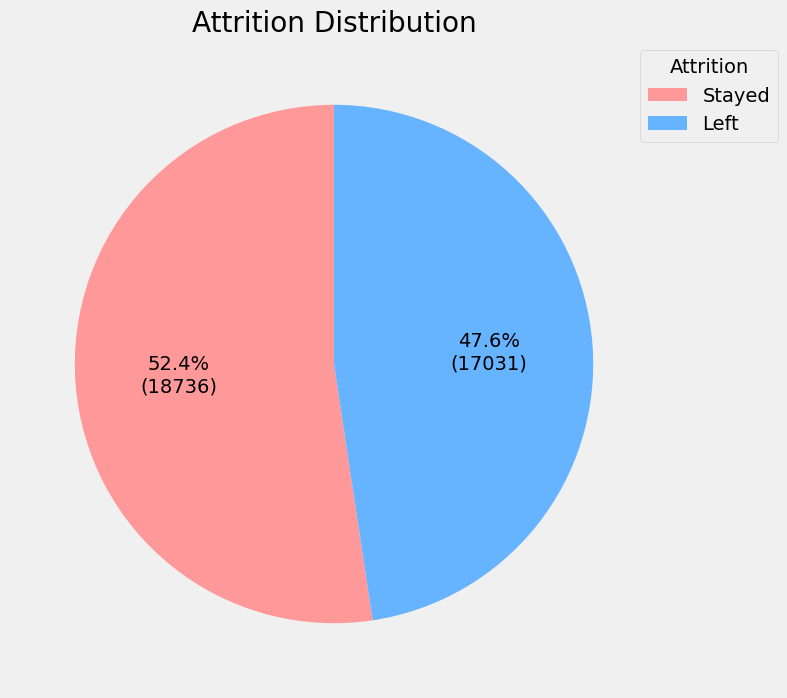

In [ ]:
import matplotlib.pyplot as plt

# Menghitung distribusi dari kolom "Attrition"
attrition_counts = df_train_cleaned['Attrition'].value_counts()

# Fungsi untuk menampilkan persentase dan jumlah
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

# Membuat pie chart tanpa label, hanya menggunakan legend
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(attrition_counts, autopct=autopct_format(attrition_counts), startangle=90, colors=['#ff9999', '#66b3ff'])

# Menambahkan legend di kanan atas
plt.legend(wedges, attrition_counts.index, title="Attrition", loc="upper right", bbox_to_anchor=(1.2, 1))

# Menambahkan judul
plt.title('Attrition Distribution')
plt.show()


## Distribusi per Kolom Kategorical

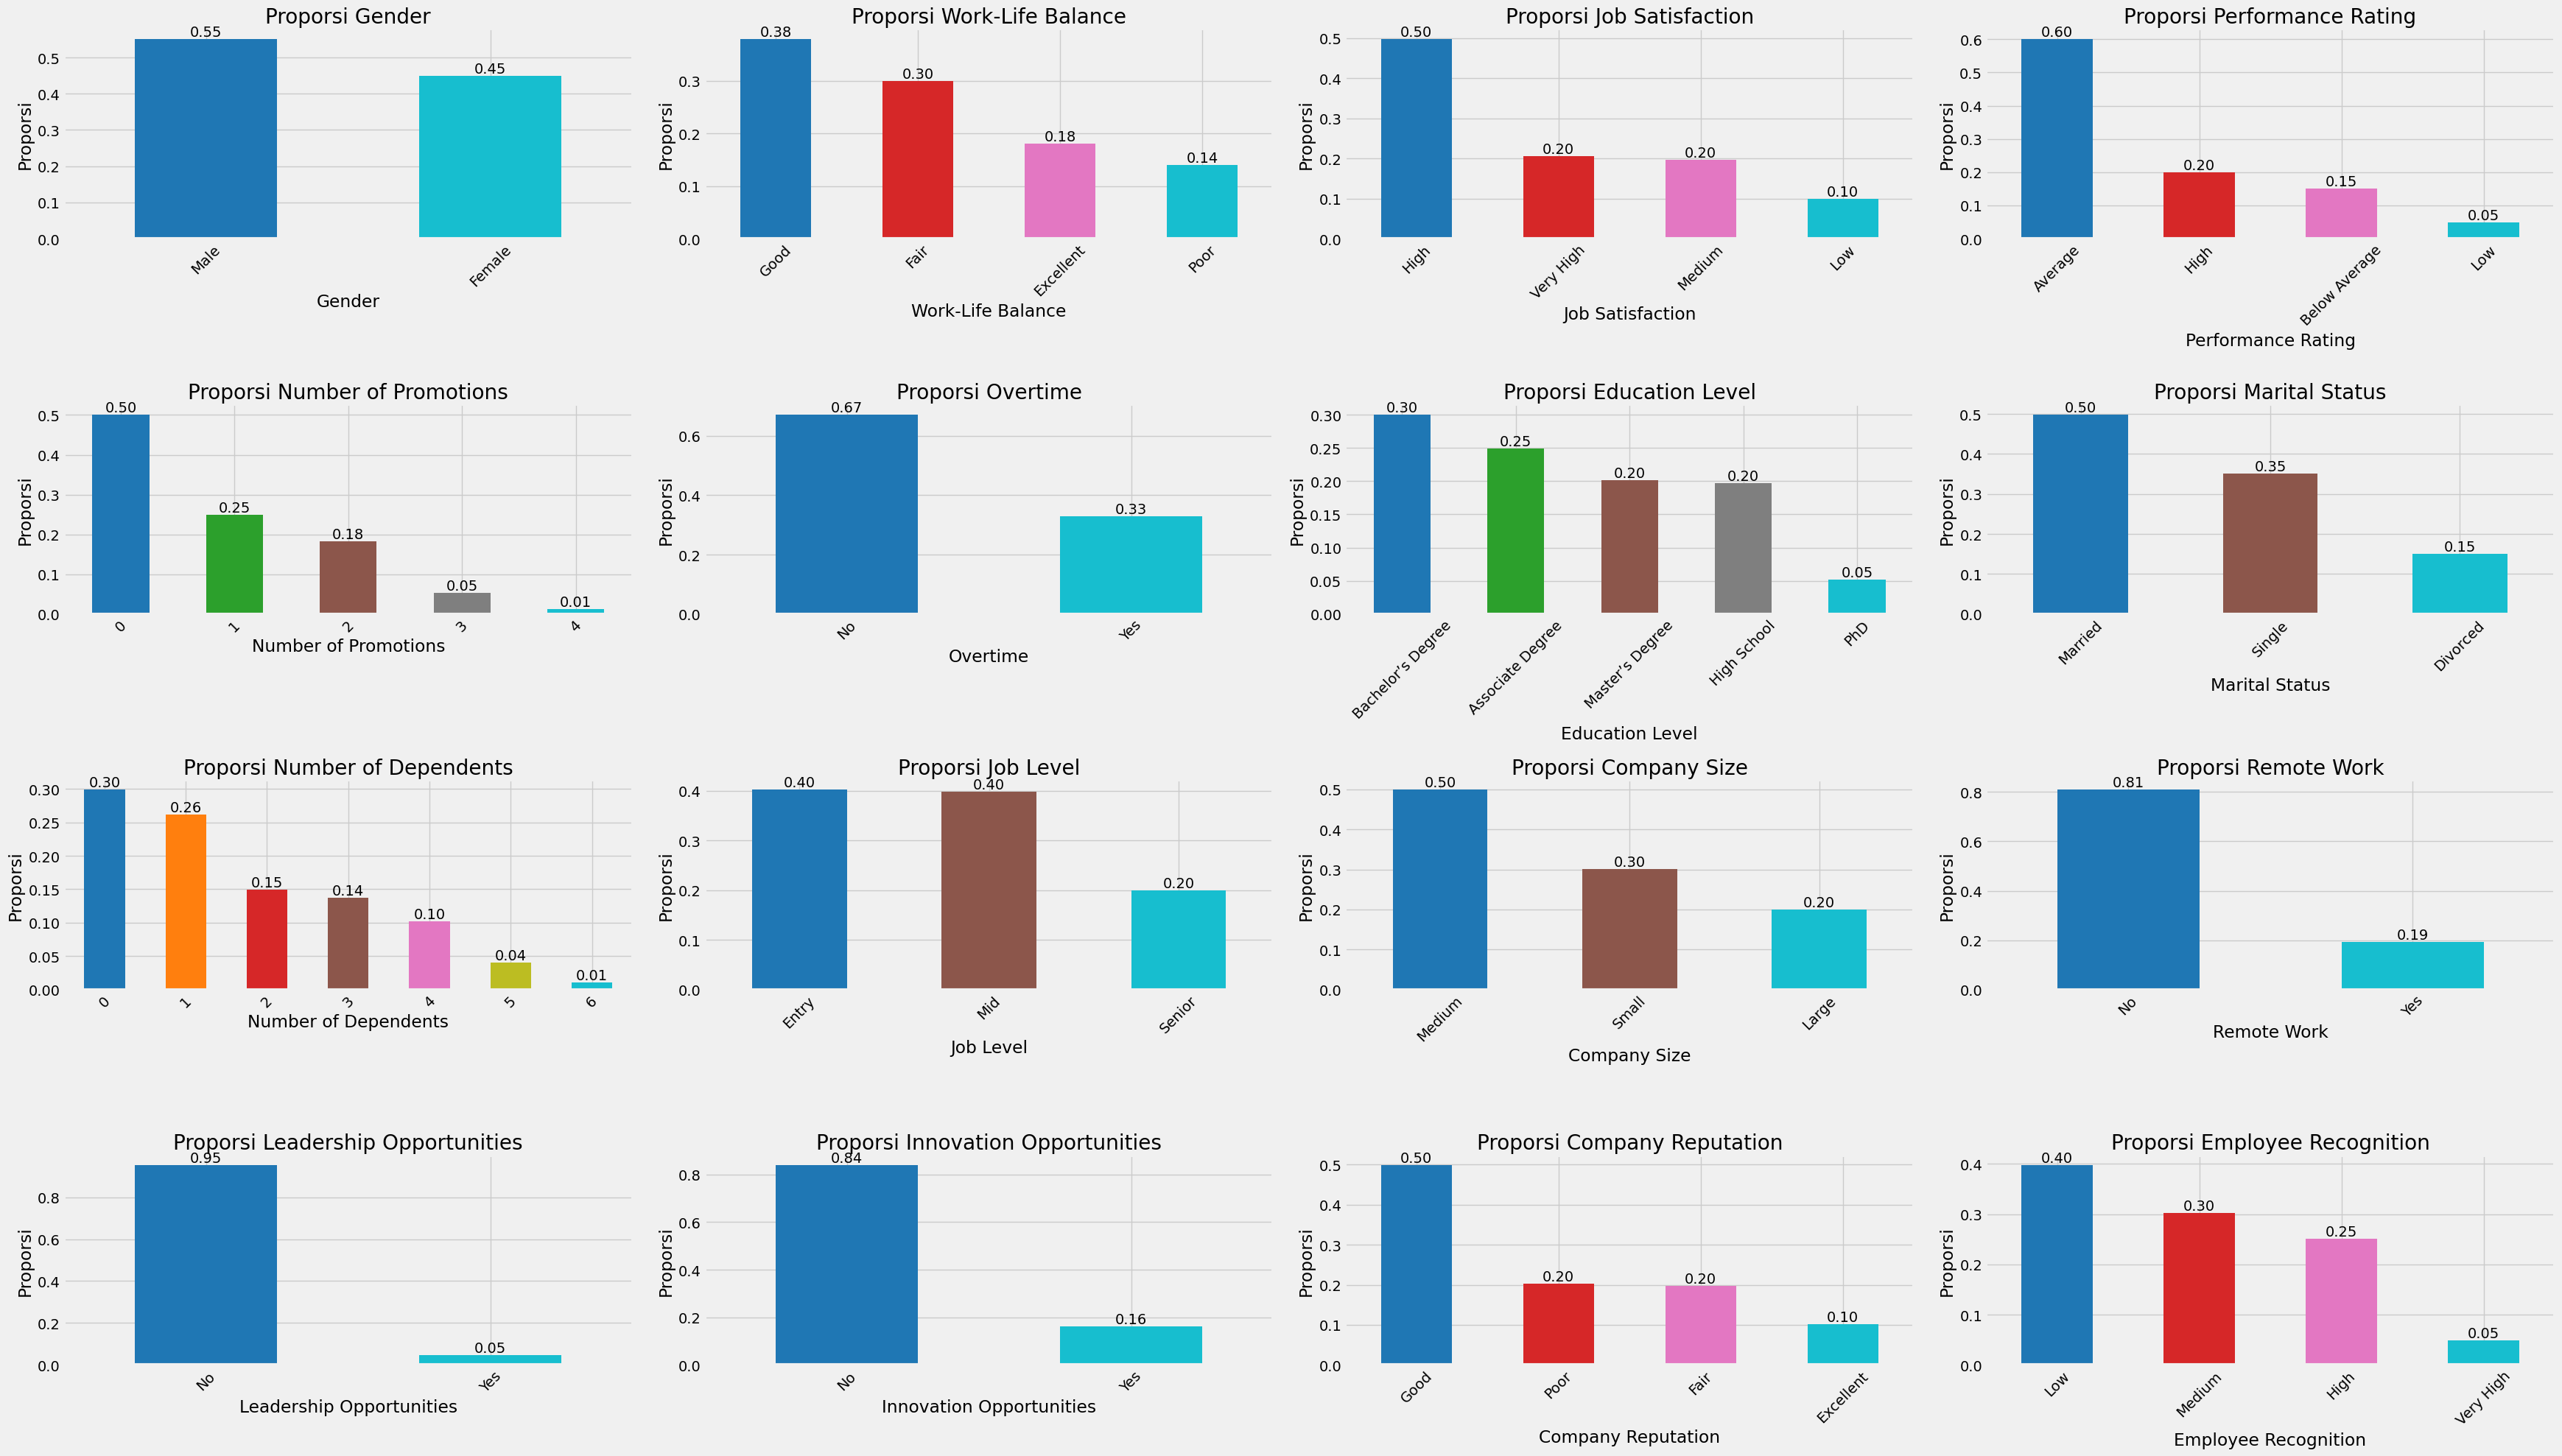

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Misalkan 'cats' adalah daftar kolom kategori
# cats = ['Category1', 'Category2', ..., 'Attrition']

# Tentukan jumlah kolom kategori (tidak termasuk 'Attrition')
n_features = len(cats) - 1  # Exclude 'Attrition'

# Tentukan jumlah kolom dan baris dalam subplot
n_cols_subplot = 4  # Anda bisa menyesuaikan ini
n_rows_subplot = int(np.ceil(n_features / n_cols_subplot))

# Buat figure dengan ukuran yang sesuai
fig, axes = plt.subplots(nrows=n_rows_subplot, ncols=n_cols_subplot, figsize=(35, 5 * n_rows_subplot))
axes = axes.flatten()  # Flatten agar mudah diiterasi

# Loop untuk membuat bar chart di tiap subplot
for index, col in enumerate(cats[:-1]):  # Iterasi hanya kolom fitur, bukan 'Attrition'
    ax = axes[index]  # Ambil subplot

    # Hitung proporsi
    count = df_train_cleaned[col].value_counts()
    proporsi = count / count.sum()  # Mengubah nilai menjadi proporsi

    # Pilih palet warna
    colors = plt.cm.get_cmap("tab10", len(proporsi))

    # Plot bar dengan proporsi
    proporsi.plot(kind="bar", ax=ax, color=colors(range(len(proporsi))))

    # Tambahkan label ke tiap bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type="edge")  # Menampilkan proporsi dalam format desimal

    # Pengaturan sumbu dan label
    ax.set_xlabel(col)
    ax.set_ylabel("Proporsi")
    ax.set_title(f"Proporsi {col}")
    ax.tick_params(axis='x', rotation=45)

# Hapus subplot kosong jika jumlah fitur tidak pas dengan jumlah subplot
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Atur tata letak agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()


Berikut adalah analisis dan insight dari setiap grafik pada gambar kedua:

1. Gender:
* Lebih banyak karyawan laki-laki (32,739) dibandingkan perempuan (26,859).
* Perbedaan gender di perusahaan ini menunjukkan proporsi karyawan laki-laki lebih besar, yang bisa berkaitan dengan budaya industri atau jenis pekerjaan yang tersedia.
2. Job Role:
* Posisi pekerjaan yang paling banyak diisi adalah Technology (15,507), diikuti oleh Healthcare (13,642) dan Finance (12,490).
Pekerjaan di Education dan Media lebih sedikit.
* Mayoritas karyawan bekerja di bidang teknologi dan perawatan kesehatan, mencerminkan fokus perusahaan pada sektor-sektor tersebut.
* Posisi di bidang pendidikan dan media mungkin memerlukan perhatian lebih untuk menarik bakat.
3. Work-Life Balance:
* Sebagian besar karyawan merasa memiliki keseimbangan kerja-hidup yang Good (22,528), diikuti oleh yang Fair (18,046), dan sedikit yang merasa Poor (8,305).
* Banyak karyawan merasa bahwa mereka memiliki keseimbangan kerja-hidup yang baik, yang bisa berkontribusi pada retensi karyawan.
* Beberapa karyawan yang merasa kurang puas dengan keseimbangan kerja-hidup bisa menjadi indikator untuk peningkatan program kesejahteraan karyawan.

4. Job Satisfaction:
* Sebagian besar karyawan memiliki tingkat kepuasan kerja yang High (29,779), sementara yang merasa Low hanya sedikit (5,891).
* Tingkat kepuasan kerja yang tinggi adalah indikator positif bagi perusahaan, namun perlu juga diperhatikan karyawan yang memiliki kepuasan kerja rendah untuk mengetahui penyebabnya.

5. Performance Rating:
* Mayoritas karyawan mendapat penilaian Average (35,810), diikuti oleh High (11,888) dan Below Average (8,950).
* Sebagian besar karyawan memiliki penilaian performa yang rata-rata, yang menunjukkan bahwa lebih banyak karyawan perlu mendapatkan feedback atau peluang pengembangan untuk meningkatkan performa mereka.

6. Number of Promotions:
* Sebagian besar karyawan belum mendapat promosi (29,716), diikuti oleh 1 promotion (14,965) dan 2 promotions (10,884).
* Banyaknya karyawan yang belum mendapatkan promosi bisa menunjukkan kebutuhan untuk memperbaiki jalur karier atau program pengembangan karyawan.
Pengurangan jumlah promosi di masa depan bisa menjadi perhatian bagi manajemen untuk mempertahankan motivasi karyawan.

7. Overtime:
* Mayoritas karyawan (40,148) tidak melakukan lembur (No), sementara 19,450 karyawan melakukan lembur (Yes).
* Lebih banyak karyawan tidak bekerja lembur, yang bisa menjadi indikasi manajemen waktu kerja yang baik.
Namun, kelompok yang bekerja lembur cukup signifikan (sekitar 32,6%), yang dapat memengaruhi kepuasan kerja dan risiko attrition.
8. Education Level:
* Pendidikan mayoritas karyawan:
Bachelor's Degree (17,826)
Associate Degree (14,915)
High School (12,020)
Hanya sedikit karyawan dengan PhD (3,089).
* Mayoritas karyawan memiliki latar belakang pendidikan sarjana, yang sesuai untuk berbagai posisi kerja profesional.
Tingkat pendidikan rendah (High School) masih cukup besar, kemungkinan untuk pekerjaan operasional atau entry-level.
9. Marital Status:
* Sebagian besar karyawan menikah (Married) (29,908).
Karyawan lajang (Single) mencapai 20,835, sedangkan yang bercerai (Divorced) berjumlah 8,855.
* Tingginya jumlah karyawan menikah dapat mengindikasikan kebutuhan akan kebijakan keseimbangan kerja-kehidupan yang mendukung.
Perbedaan signifikan antara jumlah karyawan menikah dan bercerai bisa menunjukkan bahwa status pernikahan mungkin memengaruhi stabilitas kerja.
10. Number of Dependents:
* Jumlah karyawan tanpa tanggungan (0) adalah yang tertinggi (17,848).
Jumlah karyawan dengan satu hingga dua tanggungan cukup besar (15,510 dan 8,862).
Sangat sedikit karyawan dengan lebih dari lima tanggungan (2,401 untuk lima, dan 662 untuk enam).
* Mayoritas karyawan memiliki sedikit atau tidak ada tanggungan, yang dapat memengaruhi kebutuhan tunjangan atau fleksibilitas pekerjaan.
Karyawan dengan banyak tanggungan (lebih dari 4) mungkin memerlukan insentif atau dukungan lebih.
11. Job Level:

* Karyawan pada level Entry dan Mid mendominasi (masing-masing 23,867 dan 23,753).
Karyawan pada level Senior lebih sedikit (11,978).
* Komposisi level pekerjaan ini mengindikasikan bahwa perusahaan memiliki struktur tenaga kerja yang sebagian besar berada di tingkat awal hingga menengah.
Perlu program pengembangan karier untuk meningkatkan proporsi karyawan di level senior.
12. Company Size:
* Sebagian besar karyawan bekerja di perusahaan ukuran Medium (29,745), diikuti oleh Small (17,935) dan Large (11,918).
* Perusahaan ukuran menengah mendominasi dalam data ini, menunjukkan potensi fokus pada pertumbuhan perusahaan skala tersebut.
Perbedaan yang mencolok antara perusahaan kecil, menengah, dan besar dapat menjadi pertimbangan dalam kebijakan sumber daya manusia.
13. Remote Work:
* Sebagian besar karyawan tidak bekerja secara remote (48,239) dibandingkan yang bekerja remote (11,359).
* Banyak karyawan yang bekerja secara konvensional di kantor, yang dapat menunjukkan perusahaan ini lebih memilih model kerja di lokasi.
Bekerja remote bisa menjadi area untuk pengembangan atau lebih banyak ditawarkan ke karyawan di masa depan.
14. Leadership Opportunities:
* Mayoritas karyawan tidak memiliki kesempatan untuk kepemimpinan (56,680) dibandingkan yang memiliki kesempatan (2,918).
* Perusahaan mungkin perlu menyediakan lebih banyak peluang bagi karyawan untuk berkembang dalam peran kepemimpinan agar dapat meningkatkan keterlibatan dan motivasi.
15. Innovation Opportunities:
* Sebagian besar karyawan tidak memiliki kesempatan untuk inovasi (49,895), sedangkan yang memiliki kesempatan untuk berinovasi hanya sedikit (9,703).
* Sebagian besar karyawan mungkin merasa terbatas dalam kontribusi inovasi, yang dapat mempengaruhi kepuasan dan daya tarik perusahaan sebagai tempat kerja yang kreatif.
16. Company Reputation:
* Mayoritas karyawan menganggap reputasi perusahaan Good (29,766), diikuti oleh Poor (12,034) dan Fair (11,817), sementara Excellent memiliki jumlah yang lebih sedikit (5,981).
* Reputasi perusahaan sangat dihargai oleh karyawan, tetapi masih ada sejumlah karyawan yang merasa reputasi perusahaan perlu diperbaiki.
Fokus pada peningkatan reputasi perusahaan dapat membantu meningkatkan loyalitas dan kepuasan karyawan.
17. Employee Recognition:
* Sebagian besar karyawan merasa Low pengakuannya (23,758), diikuti dengan Medium (18,033) dan High (14,844), sementara Very High pengakuannya sangat sedikit (2,963).
* Pengakuan terhadap karyawan dapat menjadi area yang perlu diperbaiki, karena banyak karyawan yang merasa kurang dihargai, yang bisa mempengaruhi retensi mereka.
18. Attrition:
* Sebagian besar karyawan stayed (31,260), sementara yang left (28,338).
* Angka attrition atau perputaran karyawan cukup signifikan dan harus dipertimbangkan. Perusahaan perlu lebih memperhatikan alasan mengapa banyak karyawan yang memilih untuk meninggalkan pekerjaan mereka agar bisa mengurangi angka perputaran karyawan yang tinggi.

## Cross Tabulasi Kolom Categorical dengan kolom Attrition

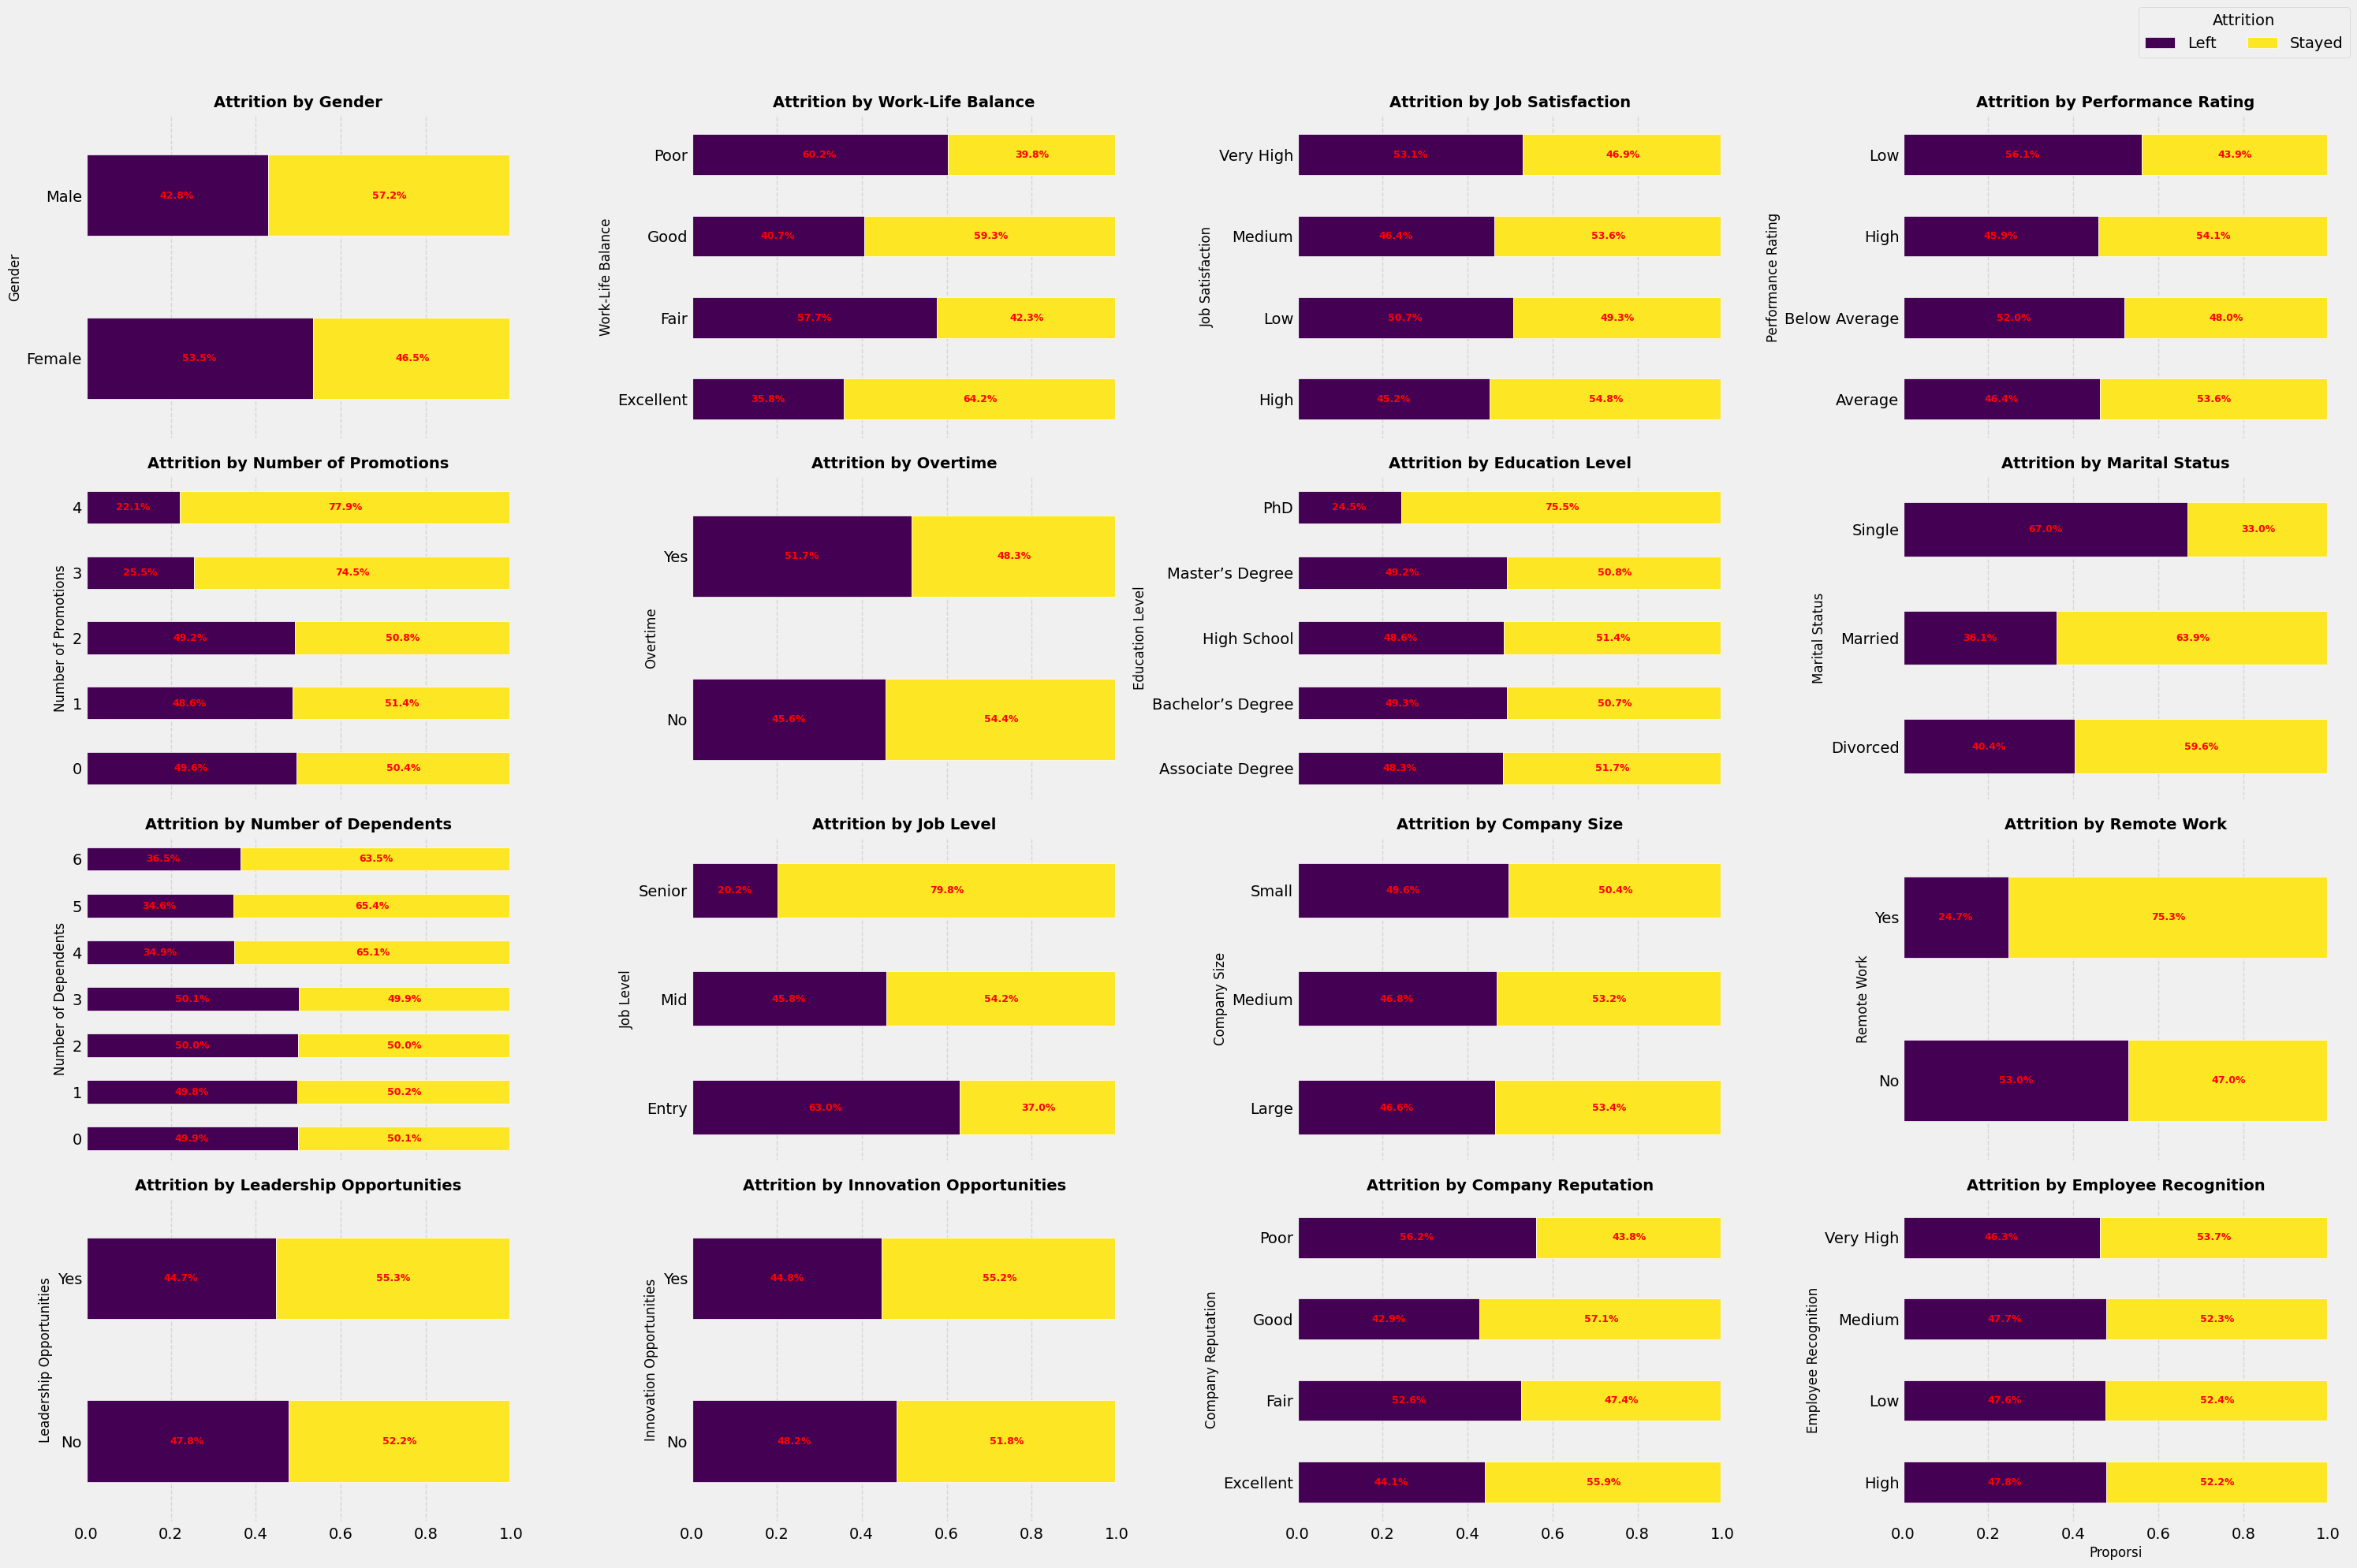

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Misalkan 'cats' adalah daftar kolom kategori termasuk target terakhir
# cats = ['Category1', 'Category2', ..., 'Attrition']

# Tentukan jumlah kolom kategori (tidak termasuk target)
n_features = len(cats) - 1

# Tentukan jumlah kolom dalam subplot (misalnya 2 atau 3 tergantung jumlah fitur)
n_cols_subplot = 4  # Anda bisa menyesuaikan ini
n_rows_subplot = int(np.ceil(n_features / n_cols_subplot))

# Tentukan ukuran gambar
fig, axes = plt.subplots(nrows=n_rows_subplot, ncols=n_cols_subplot, figsize=(30, 5 * n_rows_subplot), sharex=True)
axes = axes.flatten()  # Flatten agar mudah diiterasi

# Pilih palet warna yang sesuai
palette = sns.color_palette("viridis", n_colors=df_train_cleaned[cats[-1]].nunique())

# Loop untuk membuat stacked bar chart di tiap subplot
for index, col in enumerate(cats[:-1]):  # Loop semua kolom kecuali target (cats[-1])
    ax = axes[index]

    # Crosstab untuk proporsi
    data_crosstab = pd.crosstab(df_train_cleaned[col], df_train_cleaned[cats[-1]])
    data_crosstab_prop = data_crosstab.div(data_crosstab.sum(axis=1), axis=0)  # Normalisasi ke proporsi (0-1)

    # Plot horizontal stacked bar chart tanpa legend
    data_crosstab_prop.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', edgecolor='white', legend=False)

    # Tambahkan label proporsi dalam persen
    for n, category in enumerate(data_crosstab_prop.columns):
        for idx, value in enumerate(data_crosstab_prop[category]):
            xpos = sum(data_crosstab_prop.iloc[idx, :n+1]) - value / 2
            ypos = idx
            if value > 0.05:  # Hanya tampilkan label jika signifikan (> 5%)
                ax.text(xpos, ypos, f"{value * 100:.1f}%", ha='center', va='center', color='red', fontsize=9, weight='bold')

    # Atur judul, label, dan grid
    ax.set_title(f"Attrition by {col}", fontsize=14, weight='bold')
    ax.set_ylabel(col, fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Atur batasan agar label tidak terpotong
    ax.set_xlim(0, 1)

# Hapus subplot yang tidak terpakai jika ada
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Tambahkan label sumbu X pada subplot terakhir
axes[:n_features][-1].set_xlabel("Proporsi", fontsize=12)

# Tambahkan legenda utama untuk keseluruhan figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Attrition", loc="upper right", ncol=len(labels))

# Atur tata letak agar tidak saling tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Stastistika Deskriptif

In [ ]:
df_train_cleaned[nums].describe()

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure
count,35767.000000,35767.000000,35767.000000,35767.000000,35767.000000
mean,42.264993,12.602846,7304.127268,50.128582,52.562418
std,10.727964,9.307786,2147.112109,28.481180,24.621516
min,19.000000,1.000000,1316.000000,1.000000,2.000000
25%,34.000000,5.000000,5661.000000,26.000000,33.000000
50%,43.000000,11.000000,7360.000000,50.000000,52.000000
75%,51.000000,19.000000,8892.000000,75.000000,72.000000
max,59.000000,41.000000,13713.000000,99.000000,119.000000


## Distribusi Kolom Numerik

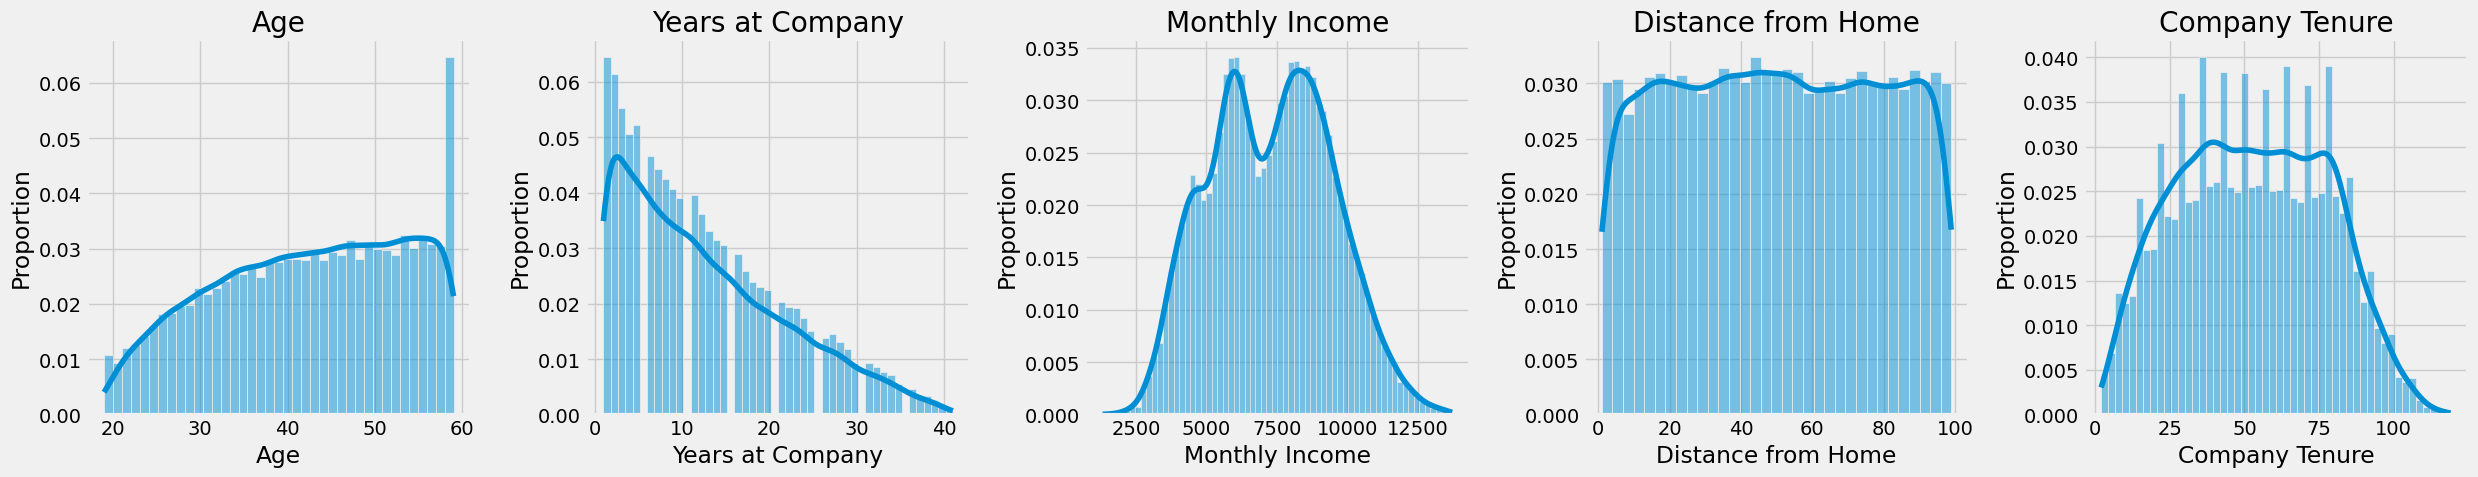

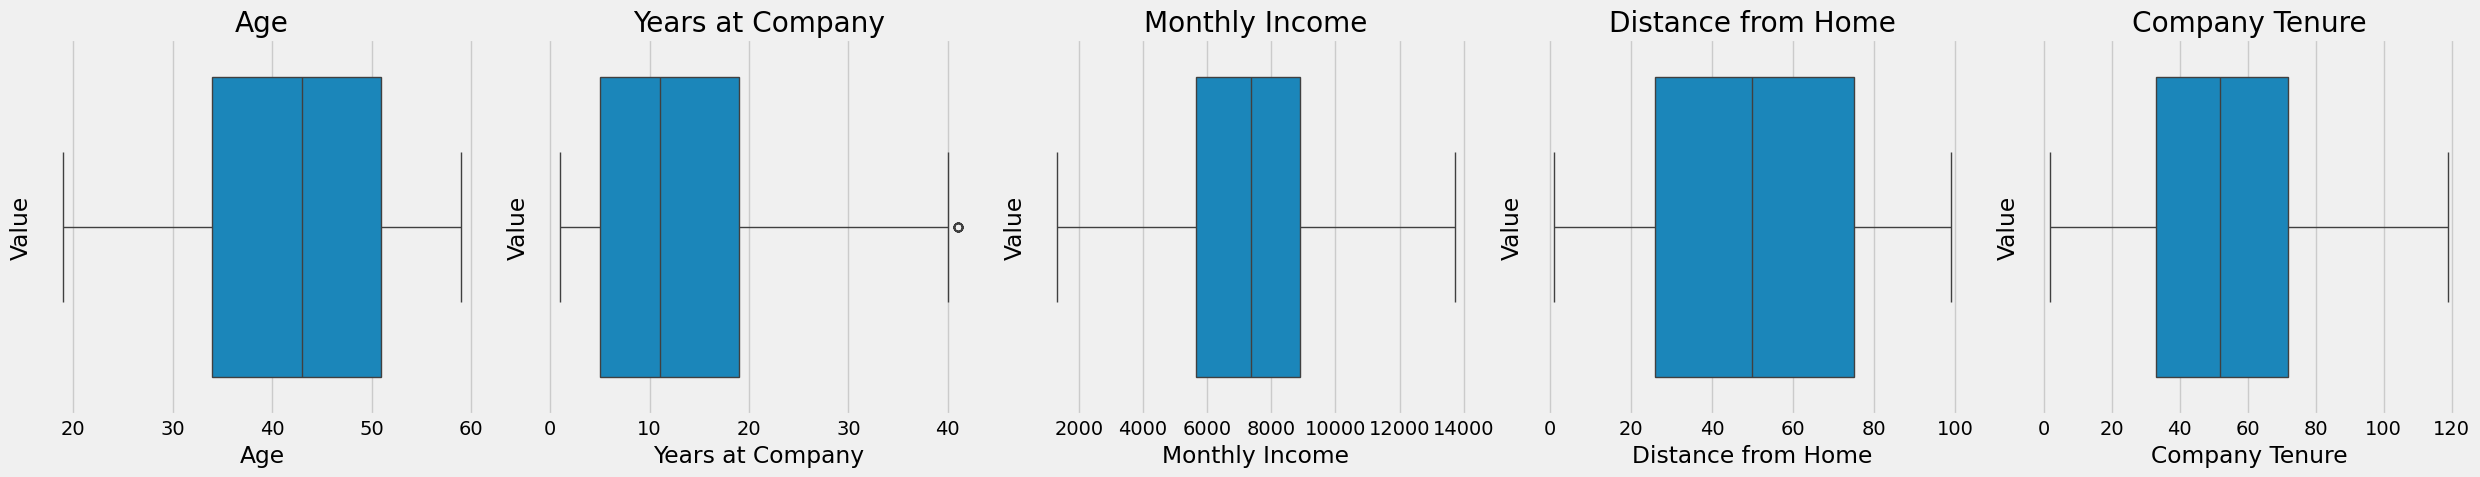

In [ ]:
# Untuk Histogram dengan KDE
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))

for i, j in enumerate(nums):
    sns.histplot(df_train_cleaned, x=j, ax=axes[i], kde=True, stat="probability")
    axes[i].set_ylabel("Proportion")  # Mengubah label sumbu Y menjadi Proportion
    axes[i].set_xlabel(j)  # Menambahkan label untuk x-axis dengan nama kolom
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

# Untuk Boxplot
fig, axes = plt.subplots(ncols=5 , figsize=(25, 5))

for i, j in enumerate(nums):
    sns.boxplot(df_train_cleaned, x=j, ax=axes[i])
    axes[i].set_ylabel("Value")  # Menambahkan label untuk y-axis
    axes[i].set_xlabel(j)  # Menambahkan label untuk x-axis dengan nama kolom
    axes[i].set_title(j)
plt.tight_layout()
plt.show()


1. Age:
* Distribusi usia karyawan cukup merata, dengan puncak distribusi di usia sekitar 20, 30, 40, dan 60 tahun.
Lonjakan pada usia tertentu (misalnya 20 dan 60) bisa menunjukkan pola perekrutan besar pada usia awal karier dan potensi pensiun.
2. Years at Company:
* Sebagian besar karyawan memiliki masa kerja kurang dari 10 tahun.
Distribusi menurun tajam setelah 10 tahun, menunjukkan bahwa semakin lama masa kerja, semakin sedikit karyawan yang tetap bertahan.
Masa kerja yang lebih lama (di atas 30 tahun) sangat jarang.
3. Monthly Income:
* Penghasilan bulanan memiliki distribusi normal, dengan puncak di sekitar 5000-6000.
* Penghasilan di atas 10.000 sangat jarang, menunjukkan bahwa hanya segelintir karyawan yang berada di tingkat penghasilan tinggi.
4. Distance from Home:
* Jarak tempat tinggal dari kantor terdistribusi merata, dengan sedikit penurunan pada jarak yang lebih jauh (> 80 km).
* Tidak ada indikasi kuat tentang distribusi yang bergeser, yang berarti jarak mungkin bukan faktor yang signifikan untuk keluar atau tetap bekerja.
5. Company Tenure:
* Sebagian besar karyawan memiliki tenure di bawah 80 bulan (6-7 tahun).
Distribusi mencapai puncak sekitar 5-7 tahun, setelah itu jumlah karyawan mulai menurun, menunjukkan kecenderungan alami turnover.

## Distribusi Kolom Numerik terhadap Setiap Kolom Categorical

In [ ]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan jumlah grafik yang akan ditampilkan (maksimum 5 numerik)
max_plots = 5  # Jumlah grafik yang ingin ditampilkan

# Iterasi untuk setiap kategori (hanya menampilkan 5 variabel numerik)
for i in cats:
    display(HTML("<h2>{}</h2>".format(i)))
    grouped = df_train_cleaned.groupby(i)

    # Hanya memproses variabel numerik hingga maksimum 5
    selected_nums = nums[:max_plots]
    fig, axes = plt.subplots(nrows=2, ncols=max_plots, figsize=(35, 12))

    for j, k in enumerate(selected_nums):
        # Grafik Boxplot untuk menggantikan barplot
        sns.boxplot(x=i, y=k, data=df_train_cleaned, ax=axes[0][j], showfliers=False, palette="Set3")
        axes[0][j].set_title(f"{k} (Boxplot)")
        axes[0][j].set_xlabel(i)
        axes[0][j].set_ylabel(k)
        axes[0][j].tick_params(axis='x', rotation=45)

        # Grafik Stripplot untuk menggantikan KDE plot
        sns.stripplot(x=i, y=k, data=df_train_cleaned, ax=axes[1][j], jitter=True, alpha=0.7, palette="husl")
        axes[1][j].set_title(f"{k} (Scatter by {i})")
        axes[1][j].set_xlabel(i)
        axes[1][j].set_ylabel(k)
        axes[1][j].tick_params(axis='x', rotation=45)

    # Menyembunyikan axes kosong jika jumlah grafik kurang dari 5
    if len(selected_nums) < max_plots:
        for empty_idx in range(len(selected_nums), max_plots):
            axes[0][empty_idx].axis("off")
            axes[1][empty_idx].axis("off")

    plt.tight_layout()
    plt.show()


## Korelasi

In [ ]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35767 entries, 1 to 59597
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       35767 non-null  int64 
 1   Gender                    35767 non-null  object
 2   Years at Company          35767 non-null  int64 
 3   Monthly Income            35767 non-null  int64 
 4   Work-Life Balance         35767 non-null  object
 5   Job Satisfaction          35767 non-null  object
 6   Performance Rating        35767 non-null  object
 7   Number of Promotions      35767 non-null  int64 
 8   Overtime                  35767 non-null  object
 9   Distance from Home        35767 non-null  int64 
 10  Education Level           35767 non-null  object
 11  Marital Status            35767 non-null  object
 12  Number of Dependents      35767 non-null  int64 
 13  Job Level                 35767 non-null  object
 14  Company Size              3

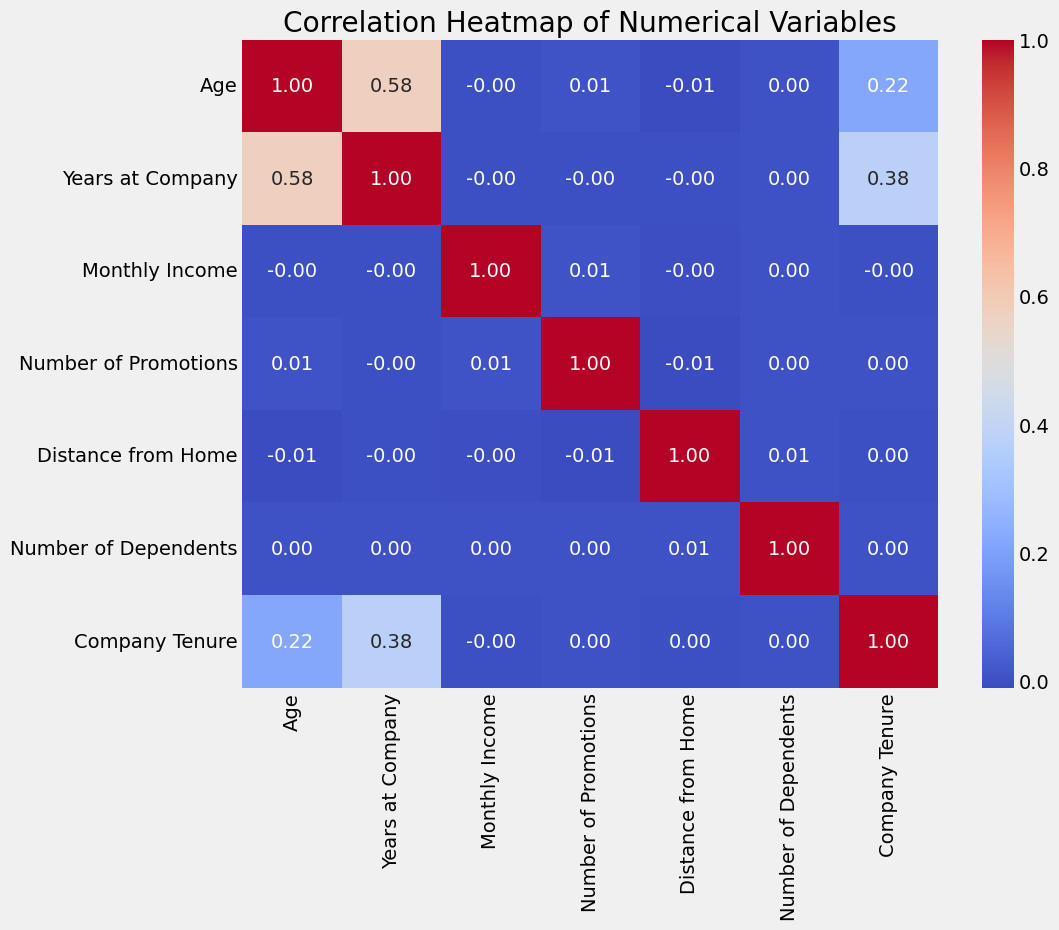

In [ ]:
# List of numerical columns to analyze
numerical_columns = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
                     'Distance from Home', 'Number of Dependents', 'Company Tenure']

# Heatmap to show correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_cleaned[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

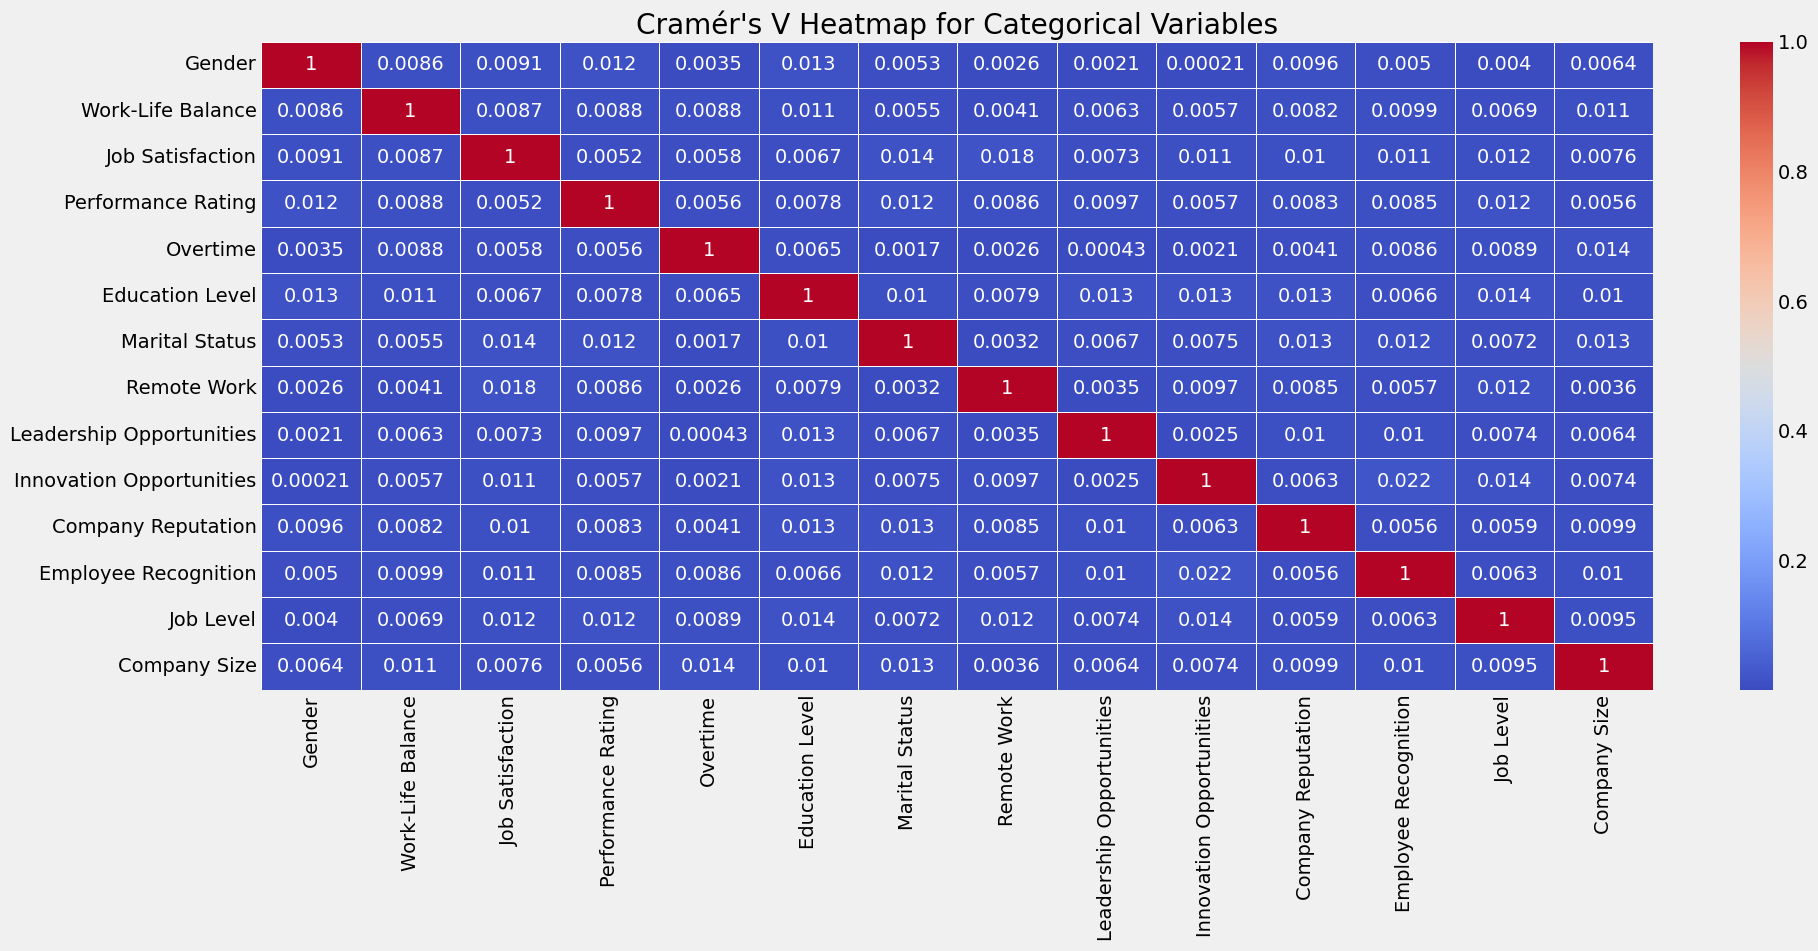

In [ ]:
# Function to calculate Cramér's V
def cramers_v(var1, var2):
    crosstab = pd.crosstab(var1, var2)  # Cross table
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()  # Sample size
    r, k = crosstab.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply to pairs of categorical columns
categorical_columns = ['Gender', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
                       'Overtime', 'Education Level', 'Marital Status', 'Remote Work',
                       'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation',
                       'Employee Recognition','Job Level', 'Company Size']

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_train_cleaned[col1], df_train_cleaned[col2])

# Convert to numeric for a heatmap visualization
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Cramér\'s V Heatmap for Categorical Variables')
plt.show()

In [ ]:
# Loop through each categorical column and run chi-square test
for col in categorical_columns:
    contingency_table = pd.crosstab(df_train_cleaned[col], df_train_cleaned['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'{col}: Chi-Square Statistic = {chi2}, p-value = {p}')

Gender: Chi-Square Statistic = 402.5994652579798, p-value = 1.4964708693472797e-89
Work-Life Balance: Chi-Square Statistic = 1381.3901423527473, p-value = 3.216282567707272e-299
Job Satisfaction: Chi-Square Statistic = 146.82842223550298, p-value = 1.273170425897903e-31
Performance Rating: Chi-Square Statistic = 114.22205163990697, p-value = 1.3538331642292916e-24
Overtime: Chi-Square Statistic = 119.0940882746991, p-value = 9.98778494271613e-28
Education Level: Chi-Square Statistic = 421.3406067702241, p-value = 6.803144119088956e-90
Marital Status: Chi-Square Statistic = 2941.4876795275513, p-value = 0.0
Remote Work: Chi-Square Statistic = 1775.0626463611866, p-value = 0.0
Leadership Opportunities: Chi-Square Statistic = 5.889120091357153, p-value = 0.015234710724435233
Innovation Opportunities: Chi-Square Statistic = 22.40164539803132, p-value = 2.211844411678535e-06
Company Reputation: Chi-Square Statistic = 465.01772435816406, p-value = 1.816728016907078e-100
Employee Recognition:

In [ ]:
# Define the independent variables (numerical columns) and the dependent variable (Attrition)
numerical_columns = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
X = df_train_cleaned[numerical_columns]
y = df_train_cleaned['Attrition'].apply(lambda x: 1 if x == 'Left' else 0)  # Convert Attrition to 0 and 1

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary to see p-values and other statistics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.678159
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                35767
Model:                          Logit   Df Residuals:                    35759
Method:                           MLE   Df Model:                            7
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                 0.02002
Time:                        10:18:30   Log-Likelihood:                -24256.
converged:                       True   LL-Null:                       -24751.
Covariance Type:            nonrobust   LLR p-value:                1.156e-209
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1412      0.066      2.153      0.031       0.013       0.270

# Feature Engineering

## Data Manipulation

In [ ]:
def categorize_income(income):
    if income < 5000:
        return 'Low'
    elif 5000 <= income <= 10000:
        return 'Medium'
    else:
        return 'High'

# Menimpa kolom Monthly Income dengan kategori
df_train_cleaned['Monthly Income'] = df_train_cleaned['Monthly Income'].apply(categorize_income)
df_test['Monthly Income'] = df_test['Monthly Income'].apply(categorize_income)

In [ ]:
df_train_cleaned['Monthly Income'].value_counts()

,count
Monthly Income,
Medium,25965
Low,5908
High,3894


<Figure size 1000x600 with 0 Axes>

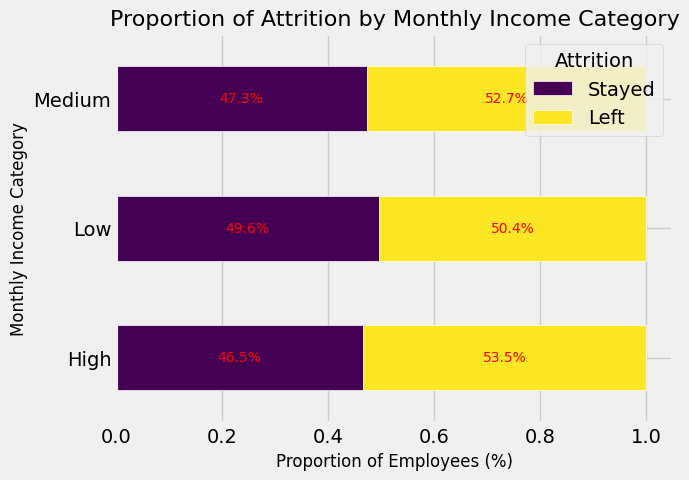

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of attrition by Monthly Income category
attrition_prop = df_train_cleaned.groupby(['Monthly Income', 'Attrition']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plotting the proportions using seaborn
plt.figure(figsize=(10,6))
ax = attrition_prop.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='white', legend=False)

# Adding title and labels
plt.title('Proportion of Attrition by Monthly Income Category', fontsize=16)
plt.xlabel('Proportion of Employees (%)', fontsize=12)
plt.ylabel('Monthly Income Category', fontsize=12)
plt.xticks(rotation=0)

# Adding the percentage labels on the bars
for i, p in enumerate(ax.patches):
    width = p.get_width()  # Get the width of the bar (proportion)
    if width > 0:  # Only add labels to visible sections
        percentage = width * 100  # Convert to percentage
        x_pos = p.get_x() + width / 2  # Compute cumulative width for correct positioning
        y_pos = p.get_y() + p.get_height() / 2  # Vertical center of the bar
        ax.text(x_pos, y_pos, f'{percentage:.1f}%',
                horizontalalignment='center', verticalalignment='center',
                color='red', fontsize=10)

# Adding legend and displaying the plot
plt.legend(title='Attrition', labels=['Stayed', 'Left'], loc='upper right')
plt.show()


## Encoding categorical Data

### Label Encoding

In [ ]:
ordinal_mappings = {
    'Work-Life Balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Job Satisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Performance Rating': {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4},
    'Education Level': {'High School': 1, 'Associate Degree': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'PhD': 5},
    'Job Level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
    'Company Reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Employee Recognition': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Company Size' : {'Small': 1, 'Medium': 2, 'Large': 3},
    'Monthly Income': {'Low': 1, 'Medium': 2, 'High': 3}
}
for col, mapping in ordinal_mappings.items():
    df_train_cleaned[col] = df_train_cleaned[col].map(mapping)
    df_test[col] = df_test[col].map(mapping)

### Binary Encoding

In [ ]:
binary_columns = ['Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Attrition', 'Overtime', 'Gender']
binary_mapping = {'No': 0, 'Yes': 1, 'Stayed': 0, 'Left': 1, 'Male': 0, 'Female': 1}
for col in binary_columns:
    df_train_cleaned[col] = df_train_cleaned[col].map(binary_mapping)
    df_test[col] = df_test[col].map(binary_mapping)

### One-Hot Encoding

In [ ]:
# Creating dummy variables for Marital Status
df_train_cleaned = pd.get_dummies(df_train_cleaned, columns=['Marital Status'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Marital Status'], drop_first=True)

In [ ]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35767 entries, 1 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       35767 non-null  int64
 1   Gender                    35767 non-null  int64
 2   Years at Company          35767 non-null  int64
 3   Monthly Income            35767 non-null  int64
 4   Work-Life Balance         35767 non-null  int64
 5   Job Satisfaction          35767 non-null  int64
 6   Performance Rating        35767 non-null  int64
 7   Number of Promotions      35767 non-null  int64
 8   Overtime                  35767 non-null  int64
 9   Distance from Home        35767 non-null  int64
 10  Education Level           35767 non-null  int64
 11  Number of Dependents      35767 non-null  int64
 12  Job Level                 35767 non-null  int64
 13  Company Size              35767 non-null  int64
 14  Company Tenure            35767 non-null  i

## Splitting Data

In [ ]:
# df = pd.concat([df_train_cleaned, df_test], ignore_index=True)

In [ ]:
# Finding feature importance values and plotting it in a horizontal bar chart
# X = df.drop(['Attrition'], axis=1)
# y = df['Attrition']

In [ ]:
X_train = df_train_cleaned.drop(['Attrition'], axis=1)
y_train = df_train_cleaned['Attrition']
X_test = df_test.drop(['Attrition'], axis=1)
y_test = df_test['Attrition']

In [ ]:
print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, {y_test.shape}')

Training data shape: (35767, 22), (35767,)
Testing data shape: (8885, 22), (8885,)


## Selected Fitur

In [ ]:
# Adjusted selected features based on insights
selected_features = [
    'Gender',
    'Work-Life Balance',
    'Job Satisfaction',
    'Performance Rating',
    'Overtime',
    'Education Level',
    'Remote Work',
    'Company Reputation',
    'Years at Company',
    'Number of Promotions',
    'Distance from Home',
    'Number of Dependents',
    'Marital Status_Single',
    'Marital Status_Married',
    'Job Level',
    'Monthly Income'
]

# Prepare the training data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Check the shape of the selected feature set
print(f'Selected training data shape: {X_train_selected.shape}')
print(f'Selected testing data shape: {X_test_selected.shape}')

Selected training data shape: (35767, 16)
Selected testing data shape: (8885, 16)


## Scalling

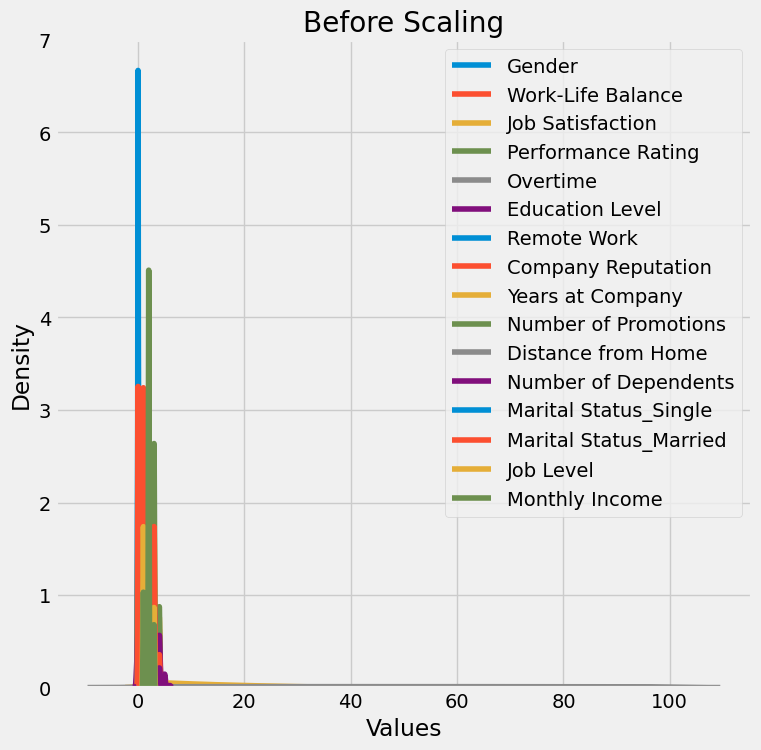

In [ ]:
# before scalling
plt.figure(figsize=(8, 8))
plt.title('Before Scaling')
plt.xlabel('Values')
for col in X_train_selected.columns:
    sns.kdeplot(X_train_selected[col], label=col)
plt.legend()
plt.show()

In [ ]:
scaler = StandardScaler()

for col in X_train_selected.columns:
    X_train_selected[col] = scaler.fit_transform(X_train_selected[[col]])
    X_test_selected[col] = scaler.transform(X_test_selected[[col]])

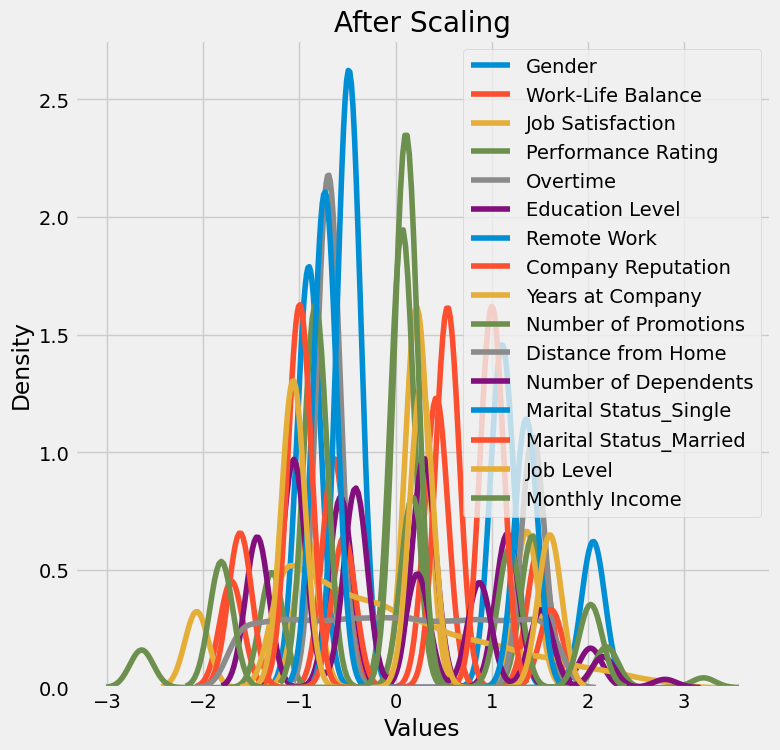

In [ ]:
#after scalling
plt.figure(figsize=(8, 8))
plt.title('After Scaling')
plt.xlabel('Values')
for col in X_train_selected.columns:
    sns.kdeplot(X_train_selected[col], label=col)
plt.legend()
plt.show()

In [ ]:
X_train_selected.head()

,Gender,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Remote Work,Company Reputation,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Marital Status_Single,Marital Status_Married,Job Level,Monthly Income
1,1.108177,-1.707684,0.219310,-2.642076,-0.699676,1.160810,-0.486445,-0.538662,-0.924276,2.193405,-1.022745,0.870861,-0.735990,-0.997849,0.269533,0.108190
3,1.108177,0.423837,0.219310,1.424268,-0.699676,-1.438982,2.055733,0.540261,-0.601961,0.175308,-0.812077,0.227133,1.358714,-0.997849,0.269533,-1.813179
5,1.108177,-0.641923,0.219310,-1.286628,-0.699676,0.294212,-0.486445,-0.538662,-1.031715,2.193405,-0.460963,-1.060324,-0.735990,1.002155,0.269533,0.108190
6,-0.902383,-0.641923,0.219310,1.424268,1.429232,-1.438982,-0.486445,0.540261,1.117054,0.175308,0.873270,0.870861,-0.735990,-0.997849,-1.065147,-1.813179
7,-0.902383,1.489597,1.363428,1.424268,-0.699676,1.160810,-0.486445,1.619183,0.364985,1.184356,-1.584528,1.514590,-0.735990,1.002155,-1.065147,2.029560


In [ ]:
y_train.head()

,Attrition
1,0
3,0
5,1
6,1
7,0


# Modelling Machine Learning

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_selected, y_train)

y_pred_rf = rf_clf.predict(X_test_selected)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_clf.predict_proba(X_test_selected)[:, 1]))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.7439504783342712
ROC AUC Score: 0.8331755846284944
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      4698
           1       0.74      0.71      0.72      4187

    accuracy                           0.74      8885
   macro avg       0.74      0.74      0.74      8885
weighted avg       0.74      0.74      0.74      8885



In [ ]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_selected, y_train)

y_pred_xgb = xgb_clf.predict(X_test_selected)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test_selected)[:, 1]))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7545301069217782
ROC AUC Score: 0.8412511693891662
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4698
           1       0.74      0.74      0.74      4187

    accuracy                           0.75      8885
   macro avg       0.75      0.75      0.75      8885
weighted avg       0.75      0.75      0.75      8885



# HP TUNNING for the best model (XGBoost)

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(random_state=42)

parameters = {
      'n_estimators': [50, 100, 150],
      'learning_rate': [0.01, 0.1, 0.2],
      'max_depth': [3, 5, 7],
      'subsample': [0.6, 0.8, 1.0],
      'colsample_bytree': [0.6, 0.8, 1.0],
  }

xgb_gridcv = GridSearchCV(xgb, parameters, cv=5, scoring='f1')
xgb_gridcv.fit(X_train_selected, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1')

In [ ]:
print("Best Parameters:", xgb_gridcv.best_params_)
print("Best Score:", xgb_gridcv.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best Score: 0.7458207068131102


In [ ]:
# Train the XGBoost Forest model with the best parameters
xgb_model =XGBClassifier(
    max_depth=3,
    n_estimators=150,
    colsample_bytree=0.8,
    subsample=0.8,
    learning_rate=0.2,
    random_state=42
)

xgb_model.fit(X_train_selected, y_train)

# Test the model
y_pred = xgb_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy after Hyperparameter Tuning: {accuracy}')

Model Accuracy after Hyperparameter Tuning: 0.7604952166572876


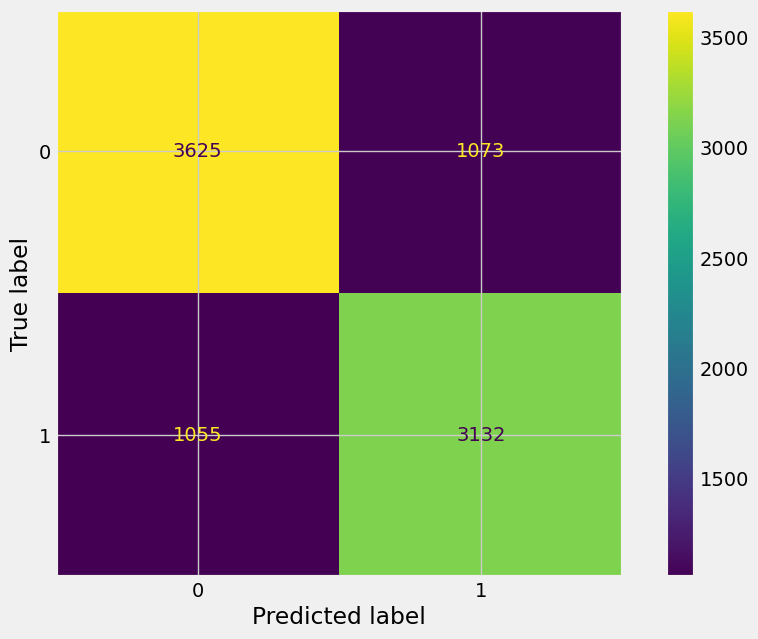

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(y_test, y_pred, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_model.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = xgb_model.predict(X_test_selected)

print("XGBoost Accuracy after HP Tunning:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_selected)[:, 1]))
print(classification_report(y_test, y_pred))

XGBoost Accuracy after HP Tunning: 0.7604952166572876
ROC AUC Score: 0.8513152876542295
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4698
           1       0.74      0.75      0.75      4187

    accuracy                           0.76      8885
   macro avg       0.76      0.76      0.76      8885
weighted avg       0.76      0.76      0.76      8885



                   Feature  Importance
12   Marital Status_Single    0.211779
14               Job Level    0.192392
6              Remote Work    0.150159
1        Work-Life Balance    0.090119
0                   Gender    0.058902
9     Number of Promotions    0.047284
7       Company Reputation    0.043163
5          Education Level    0.037794
11    Number of Dependents    0.032092
13  Marital Status_Married    0.030935
4                 Overtime    0.023725
2         Job Satisfaction    0.020559
10      Distance from Home    0.019843
3       Performance Rating    0.017575
8         Years at Company    0.015458
15          Monthly Income    0.008221


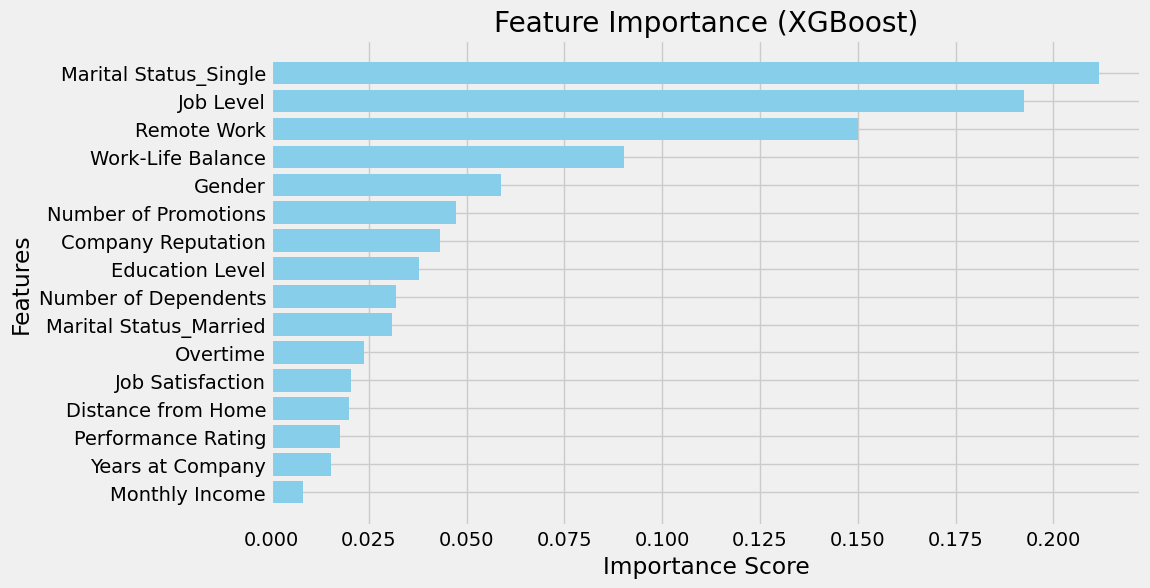

In [ ]:
importance = xgb_model.feature_importances_
features = X_train_selected.columns

# Membuat DataFrame untuk fitur penting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan fitur penting
print(importance_df)

# Plot Fitur Penting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Membalik urutan sumbu Y
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'trained_model.pkl')
print("Trained  model saved successfully.")

Trained  model saved successfully.


In [ ]:
model = joblib.load('trained_model.pkl')
def predict_employee_attrition(file_path):
    # Load the input CSV file
    input_data = pd.read_csv(file_path)

    # Salin DataFrame asli untuk mempertahankan semua kolom input
    original_data = input_data.copy()

    # Proses data untuk fitur yang digunakan dalam model
    ordinal_mappings = {
        'Work-Life Balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
        'Job Satisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
        'Performance Rating': {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4},
        'Education Level': {'High School': 1, 'Associate Degree': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'PhD': 5},
        'Job Level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
        'Company Reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
        'Employee Recognition': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
        'Company Size' : {'Small': 1, 'Medium': 2, 'Large': 3},
        'Monthly Income': {'Low': 1, 'Medium': 2, 'High': 3}
    }

    for col, mapping in ordinal_mappings.items():
        input_data[col] = input_data[col].map(mapping)

    # Binary encoding for binary columns
    binary_columns = ['Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Overtime', 'Gender']
    binary_mapping = {'No': 0, 'Yes': 1, 'Male': 0, 'Female': 1}

    for col in binary_columns:
        input_data[col] = input_data[col].map(binary_mapping)

    # Creating dummy variables for Marital Status
    input_data = pd.get_dummies(input_data, columns=['Marital Status'], drop_first=True)

    # Ensure the input data has the same features as the model was trained on
    selected_features = [
        'Gender', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level',
        'Remote Work', 'Company Reputation', 'Years at Company', 'Number of Promotions', 'Distance from Home',
        'Number of Dependents', 'Marital Status_Single', 'Marital Status_Married', 'Job Level','Monthly Income'
    ]
    input_data = input_data[selected_features]
    scaler = StandardScaler()
    for col in input_data.columns:
      input_data[col] = scaler.fit_transform(input_data[[col]])

    # Make predictions
    predictions = model.predict(input_data)

    # Add predictions to the DataFrame
    input_data['Attrition Prediction'] = predictions

    # Calculate additional columns
    input_data['Annual Income'] = original_data['Monthly Income'] * 12
    input_data['Replacement Cost'] = (original_data['Monthly Income'] * 12) * 0.33

    # Decode the predicted values back to the original labels
    input_data['Attrition Prediction'] = input_data['Attrition Prediction'].map({0: 'Stayed', 1: 'Left'})

    # The `original_data` has all the original columns (including those not used by the model)
    result_data = pd.concat([original_data, input_data[['Attrition Prediction', 'Annual Income', 'Replacement Cost']]], axis=1)

    return result_data


In [ ]:
# Example usage:
predictions = predict_employee_attrition('test.csv')
predictions.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Attrition Prediction,Annual Income,Replacement Cost
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,83,Master’s Degree,Married,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed,Left,96348,31794.84
1,30585,35,Male,7,Education,4563,Good,High,Average,1,Yes,55,Associate Degree,Single,4,Entry,Medium,27,No,No,No,Good,High,Left,Left,54756,18069.48
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,Yes,14,Associate Degree,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed,Left,66996,22108.68
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,43,Master’s Degree,Single,4,Entry,Medium,96,No,No,No,Poor,Low,Left,Left,66300,21879.00
4,15667,39,Male,24,Education,4604,Good,High,Average,0,Yes,47,Master’s Degree,Married,6,Mid,Large,45,Yes,No,No,Good,High,Stayed,Stayed,55248,18231.84


In [ ]:
predictions['Attrition Prediction'].value_counts()

,count
Attrition Prediction,
Left,11500
Stayed,3400


In [ ]:
# Misalnya, jika ada kolom 'Attrition' dalam data asli:
comparison = pd.DataFrame({
    'Predicted Attrition': predictions['Attrition Prediction'],
    'Actual Attrition': predictions['Attrition']  # Pastikan data ini ada di input_data
})

# Menampilkan beberapa hasil perbandingan
print(comparison.head())


  Predicted Attrition Actual Attrition
0                Left           Stayed
1                Left             Left
2                Left           Stayed
3                Left             Left
4              Stayed           Stayed


In [ ]:
from sklearn.metrics import classification_report

# Pastikan Anda memiliki data asli yang sesuai (misalnya 'Attrition' adalah target)
y_true = predictions['Attrition'].map({'Stayed': 0, 'Left': 1})   # Target asli
y_pred = predictions['Attrition Prediction'].map({'Stayed': 0, 'Left': 1})  # Mengonversi prediksi ke angka

# Menampilkan classification report untuk evaluasi
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.38      0.53      7868
           1       0.57      0.94      0.71      7032

    accuracy                           0.64     14900
   macro avg       0.72      0.66      0.62     14900
weighted avg       0.73      0.64      0.61     14900



In [ ]:
# Simpan model dalam format JSON
xgb_model.save_model('trained_model.json')
print("Model berhasil disimpan sebagai JSON.")

Model berhasil disimpan sebagai JSON.


# Summary

* Model menunjukkan performa yang baik dalam memprediksi "Attrition" (berhenti atau tetap bekerja), dengan precision dan recall yang seimbang untuk kategori "Stayed" dan "Left". F1-score berbobot sebesar 0.76 menunjukkan model dapat diandalkan, meskipun masih ada ruang untuk peningkatan, khususnya dalam membedakan dua kelas tersebut.

* Feature Importance (XGBoost): Beberapa fitur paling berpengaruh dalam memprediksi attrition berdasarkan grafik:

  * Job Level: Fitur paling signifikan. Tingkat jabatan memiliki hubungan besar terhadap keputusan untuk tetap atau berhenti bekerja.
  * Marital Status_Single: Karyawan yang belum menikah lebih cenderung berhenti bekerja dibandingkan yang sudah menikah.
  * Remote Work: Fleksibilitas kerja jarak jauh sangat memengaruhi keputusan karyawan.
  * Marital Status_Married: Status pernikahan memiliki pola perilaku attrition yang unik dibandingkan status lainnya.
  * Work-Life Balance: Keseimbangan kerja dan kehidupan yang lebih baik menurunkan risiko attrition.
  * Gender: Faktor gender juga berperan, meskipun pengaruhnya lebih kecil dibandingkan fitur utama lainnya.
  * Fitur seperti Leadership Opportunities, Innovation Opportunities, dan Performance Rating memiliki pengaruh yang lebih rendah, menunjukkan bahwa fitur ini tidak terlalu signifikan dibandingkan fitur utama.






# Recommendation

## Business Recommendation


1. Fokus pada Retensi Kelompok Karyawan Penting:
  * Berikan peluang pengembangan karier yang disesuaikan untuk karyawan dengan level jabatan tinggi, karena fitur ini paling memengaruhi keputusan attrition.
  * Desain program khusus untuk karyawan yang belum menikah, karena mereka cenderung lebih berisiko berhenti dibandingkan yang sudah menikah.
2. Manfaatkan Kebijakan Remote Work:
  * Perkuat kebijakan kerja fleksibel (misalnya opsi hybrid atau remote) untuk mengurangi attrition, karena ini menjadi faktor signifikan dalam mempertahankan karyawan.
3. Tingkatkan Work-Life Balance:
  * Promosikan inisiatif yang mendukung keseimbangan kerja dan kehidupan, seperti manajemen beban kerja, program kesejahteraan karyawan, dan jam kerja fleksibel.
4. Pantau Tingkat Kepuasan Kerja:
  * Walaupun pengaruhnya lebih kecil dibandingkan fitur lain, menjaga tingkat kepuasan kerja tetap tinggi melalui umpan balik dan keterlibatan terus menerus sangat penting.
5. Eksplorasi Fitur yang Kurang Signifikan:
  * Meskipun Leadership Opportunities dan Innovation Opportunities kurang signifikan, perbaikan di area ini dapat memberikan dampak tambahan jika sesuai dengan nilai perusahaan.


## Model Recommendation for the next

* Untuk meningkatkan performa model, pertimbangkan:
* Penyesuaian hyperparameter lebih lanjut.
* Eksplorasi model ensemble untuk meningkatkan precision dan recall.
* Mengumpulkan data tambahan untuk menangani potensi ketidakseimbangan kelas (jika ada).